<a href="https://colab.research.google.com/github/devk232/Introduction-To-Robotics-Assignments/blob/main/2019BCS018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras import regularizers
import numpy as np


l1 = l2 = l3 = 7 # length of manipulators


In [6]:
## Generating dataset for training

def three_link_manipulator_dataset():
    rows = []
    for i in range(1, 100000):
        theta1 = round(random.uniform(0, math.pi), 2)
        theta2 = round(random.uniform(-math.pi, 0), 2)
        theta3 = round(random.uniform(-math.pi/2, math.pi/2), 2)
        
        x = round(l1*math.cos(theta1)+l2*math.cos(theta1+theta2)+l3*math.cos(theta1+theta2+theta3), 2)
        y = round(l1*math.sin(theta1)+l2*math.sin(theta1+theta2)+l3*math.sin(theta1+theta2+theta3), 2)
        phi = round(math.degrees(theta1)+math.degrees(theta2)+math.degrees(theta3), 2)
        
        rows.append([theta1, theta2, theta3, x, y, phi])

    df = pd.DataFrame(rows, columns=['theta1', 'theta2', 'theta3', 'x', 'y', 'phi'])
    df.to_csv('three_link.csv', index=False)
    
three_link_manipulator_dataset()


In [7]:
three_link_data = pd.read_csv('three_link.csv')
three_link_data.head()

,theta1,theta2,theta3,x,y,phi
0,0.33,-1.30,1.55,16.43,0.33,33.23
1,2.38,-1.02,1.27,-9.71,15.10,150.69
2,1.96,-1.42,1.11,2.79,17.05,94.54
3,0.61,-2.47,-1.09,-3.13,-4.03,-169.02
4,0.96,-1.43,0.83,16.81,5.03,20.63


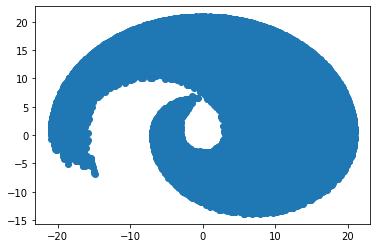

In [8]:
plt.scatter(three_link_data['x'], three_link_data['y'])
plt.show()

In [10]:
# Splitting training and testing dataset

X = three_link_data[['x', 'y', 'phi']]
y = three_link_data[['theta1', 'theta2', 'theta3']]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1)


In [13]:
# Defining model

model = models.Sequential()
model.add(layers.Dense(units=3, input_dim=3, kernel_initializer='uniform'))
model.add(layers.Dense(units=100, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dense(units=100, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dense(units=100, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dense(units=3, kernel_initializer = 'uniform', activation='linear'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_6 (Dense)              (None, 100)               400       
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 303       
Total params: 20,915
Trainable params: 20,915
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [16]:
history = model.fit(train_X, train_y, epochs=30, validation_split=0.1, shuffle=True)

Train on 80999 samples, validate on 9000 samples
Epoch 1/30
80352/80999 [============================>.] - ETA: 0s - loss: 0.1764 - acc: 0.9365

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


80999/80999 [==============================] - 5s 59us/sample - loss: 0.1753 - acc: 0.9368 - val_loss: 0.0425 - val_acc: 0.9584
Epoch 2/30
80999/80999 [==============================] - 5s 58us/sample - loss: 0.0262 - acc: 0.9712 - val_loss: 0.0324 - val_acc: 0.9653
Epoch 3/30
80999/80999 [==============================] - 4s 55us/sample - loss: 0.0210 - acc: 0.9748 - val_loss: 0.0265 - val_acc: 0.9799
Epoch 4/30
80999/80999 [==============================] - 5s 57us/sample - loss: 0.0192 - acc: 0.9773 - val_loss: 0.0170 - val_acc: 0.9822
Epoch 5/30
80999/80999 [==============================] - 4s 55us/sample - loss: 0.0180 - acc: 0.9787 - val_loss: 0.0188 - val_acc: 0.9770
Epoch 6/30
80999/80999 [==============================] - 5s 58us/sample - loss: 0.0171 - acc: 0.9790 - val_loss: 0.0180 - val_acc: 0.9808
Epoch 7/30
80999/80999 [==============================] - 5s 57us/sample - loss: 0.0166 - acc: 0.9796 - val_loss: 0.0239 - val_acc: 0.9793
Epoch 8/30
80999/80999 [==============

In [ ]:
## Performance of model for "Line"
from sklearn.metrics import mean_squared_error

data=pd.read_csv('one.csv')

#root mean error
X_true=data['xe']
X_pred=data['t1']
rmse_x=mean_squared_error(X_true,X_pred)

Y_true=data['ye']
Y_pred=data['t2']
rmse_y=mean_squared_error(Y_true,Y_pred) 

print('\nrmse in x = ', rmse_x) 
print('rmse in y = ', rmse_y)

## adjusted rsquared test
regressor_OLS = sm.OLS(endog = X_true, exog = X_pred).fit() 
print(regressor_OLS.rsquared_adj)
regressor_OLS = sm.OLS(endog = Y_true, exog = Y_pred).fit() 
print(regressor_OLS.rsquared_adj)  


rmse in x =  0.02557299999999997
rmse in y =  0.06854981818181818
0.9997725255491904
0.9981627711860964


'img.mimsave(\'Figure/animatecircle.gif\',images) \nimport glob, os\nfor f in glob.glob("Figure/circle*.png"):\n    os.remove(f)'

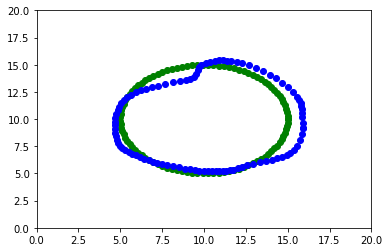

In [ ]:
## trying to plot "Circle"
def circleFile():
    with open('circle.csv', 'w') as csvFile:
        row = ['q1','q2','q3','xe','ye','thetae','t1','t2','t3']
        csv.writer(csvFile).writerow(row)
        Xc = 10
        Yc = 10
        r = 5
        data_points =100
        points = np.linspace(0,360,num =data_points)
        for p in points:
            i=Xc + r*m.cos(np.radians(p))
            j=Yc + r*m.sin(np.radians(p))
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            #plt.xlim([0,20])
            #plt.ylim([0,20])
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
                
    csvFile.close()
    
circleFile()

def plot_point(point, angle, length):
    x, y = point
    endy = y + length * m.sin(angle)
    endx = x + length * m.cos(angle)
    #plt.xlim([0,6])
    #plt.ylim([0,6])
    #plt.plot([x, endx], [y, endy])
    return endx,endy

filename = 'circle.csv'
data = np.loadtxt(filename, delimiter=",", skiprows=1)


ang1 = [row[0] for row in data]
ang2 = [row[1] for row in data]
ang3 = [row[2] for row in data]

point = [0,0]
c = 1
images = []
for i in range(len(data)):
    #fileName = 'Figure/circle' + str(c) + '.png'
    point = plot_point([0,0],ang1[i],l1)
    point = plot_point(point,ang1[i]+ang2[i],l2)
    point=plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    plt.xlim([0,20])
    plt.ylim([0,20])
    plt.plot(point[0],point[1],'bo')
    #plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    #plt.savefig(fileName)
    #images.append(img.imread(fileName))
    #c = c+1
    
'''img.mimsave('Figure/animatecircle.gif',images) 
import glob, os
for f in glob.glob("Figure/circle*.png"):
    os.remove(f)'''

In [ ]:
## Performance of model for "Circle"
from sklearn.metrics import mean_squared_error

data=pd.read_csv('circle.csv')

#rmse
X_true=data['xe']
X_pred=data['t1']
rmse_x=mean_squared_error(X_true,X_pred)

Y_true=data['ye']
Y_pred=data['t2']
rmse_y=mean_squared_error(Y_true,Y_pred) 

print('\nrmse in x = ', rmse_x) 
print('rmse in y = ', rmse_y)

## adjusted rsquared test
regressor_OLS = sm.OLS(endog = X_true, exog = X_pred).fit() 
print(regressor_OLS.rsquared_adj)
regressor_OLS = sm.OLS(endog = Y_true, exog = Y_pred).fit() 
print(regressor_OLS.rsquared_adj) 


rmse in x =  0.34296633776712054
rmse in y =  0.36275527684891223
0.9972587538469212
0.9971471382908279


0.005099999999998772


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:265: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


'img.mimsave(\'Figure/animatecircle.gif\',images) \nimport glob, os\nfor f in glob.glob("Figure/circle*.png"):\n    os.remove(f)'

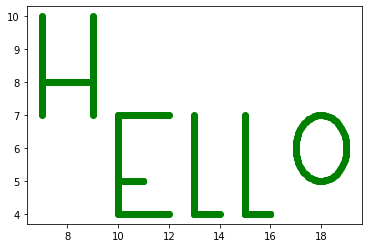

In [ ]:
## trying to plot "HELLO"   

def helloFile():
  with open('hello.csv', 'w') as csvFile:
        row = ['q1','q2','q3','xe','ye','thetae','t1','t2','t3']
        csv.writer(csvFile).writerow(row)

        # for H
        arr=np.linspace(7,10,100)
        for j in arr:
            i= 7
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])
            
            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        arr=np.linspace(7,9,100)
        for i in arr:
            j=8
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])
            
            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        arr=np.linspace(7,10,100)
        for j in arr:
            i= 9
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        # for E
        arr=np.linspace(4,7,100)
        for j in arr:
            i= 10
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])
            
            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
        
        arr=np.linspace(10,12,100)
        for i in arr:
            j=7
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])
            
            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        arr=np.linspace(10,11,100)
        for i in arr:
            j=5
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        arr=np.linspace(10,12,100)
        for i in arr:
            j=4
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        # for L
        arr=np.linspace(4,7,100)
        for j in arr:
            i= 13
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)

            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        arr=np.linspace(13,14,100)
        for i in arr:
            j=4
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)

            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        # for L
        arr=np.linspace(4,7,100)
        for j in arr:
            i= 15
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)

            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        arr=np.linspace(15,16,100)
        for i in arr:
            j=4
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)

            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
        
        Xc = 18
        Yc = 6
        r = 1
        data_points =100
        points = np.linspace(0,360,num =data_points)
        for p in points:
            i=Xc + r*m.cos(np.radians(p))
            j=Yc + r*m.sin(np.radians(p))
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)

            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
  csvFile.close()
        
    
helloFile()

def plot_point(point, angle, length):
    x, y = point
    endy = y + length * m.sin(angle)
    endx = x + length * m.cos(angle)
    #plt.xlim([0,6])
    #plt.ylim([0,6])
    #plt.plot([x, endx], [y, endy])
    return endx,endy

filename = 'hello.csv'
data = np.loadtxt(filename, delimiter=",", skiprows=1)


ang1 = [row[0] for row in data]
ang2 = [row[1] for row in data]
ang3 = [row[2] for row in data]

point = [0,0]
c = 1
images = []
import time

time_start = time.clock()
for i in range(len(data)):
    #fileName = 'Figure/circle' + str(c) + '.png'
    point = plot_point([0,0],ang1[i],l1)
    point = plot_point(point,ang1[i]+ang2[i],l2)
    point=plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    #plt.xlim([0,20])
    #plt.ylim([0,20])
    #plt.plot(point[0],point[1],'bo')
    #plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    #plt.savefig(fileName)
    #images.append(img.imread(fileName))
    #c = c+1
time_elapsed = (time.clock() - time_start)
print(time_elapsed)   
'''img.mimsave('Figure/animatecircle.gif',images) 
import glob, os
for f in glob.glob("Figure/circle*.png"):
    os.remove(f)'''

In [ ]:
## Performance of Model for "Hello"
from sklearn.metrics import mean_squared_error

data=pd.read_csv('hello.csv')

X_true=data['xe']
X_pred=data['t1']
rmse_x=mean_squared_error(X_true,X_pred)

Y_true=data['ye']
Y_pred=data['t2']
rmse_y=mean_squared_error(Y_true,Y_pred) 

print('\nrmse in x = ', rmse_x) 
print('rmse in y = ', rmse_y)

## adjusted rsquared test
regressor_OLS = sm.OLS(endog = X_true, exog = X_pred).fit() 
print(regressor_OLS.rsquared_adj)
regressor_OLS = sm.OLS(endog = Y_true, exog = Y_pred).fit() 
print(regressor_OLS.rsquared_adj) 


rmse in x =  0.21105483950430864
rmse in y =  0.19406496982788787
0.9986421207920287
0.9960659263262843
